<a href="https://colab.research.google.com/github/yewonbahn/mystudy/blob/master/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%99%9C%EC%9A%A9%ED%95%9C%2C_%ED%95%84%ED%84%B0_%EC%97%B0%EC%82%B0_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle #파이썬3에서는 cPickcle이 pickle로 변경

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



In [25]:
with open('/content/0129-2-Lines.data','rb') as file:
  images, labels = pickle.load(file, encoding='latin1') #유니코드 에러나서,encoding='latin1'내용 추가함.

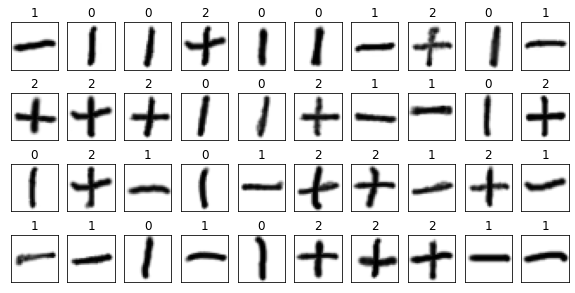

In [26]:
fig=plt.figure(figsize=(10,5))
for i in range(40):
  subplot=fig.add_subplot(4,10,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title("%d" %np.argmax(labels[i]))
  subplot.imshow(images[i].reshape(28,28),vmin=0,vmax=1,
                 cmap=plt.cm.gray_r)

In [37]:
def edge_filter():
  filter0=np.array(
      [[2,1,0,-1,-2],
       [3,2,0,-2,-3],
       [4,3,0,-3,-4],
       [3,2,0,-2,-3],
       [2,1,0,-1,-2]])/23.0
  
  filter1=np.array(
      [[2,3,4,3,2],
       [1,2,3,2,1],
       [0,0,0,0,0],
       [-1,-2,-3,-2,-1],
       [-2,-3,-4,-3,-2]])/23.0
  filter_array=np.zeros([5,5,1,2])
  filter_array[:,:,0,0]=filter0
  filter_array[:,:,0,1]=filter1

  return tf.constant(filter_array,dtype=tf.float32)




In [39]:
x=tf.placeholder(tf.float32,[None,784])
x_image=tf.reshape(x,[-1,28,28,1])

W_conv= edge_filter()
h_conv=tf.abs(tf.nn.conv2d(x_image,W_conv,strides=[1,1,1,1],padding="SAME"))

h_conv_cutoff=tf.nn.relu(h_conv-0.2)
h_pool=tf.nn.max_pool(h_conv_cutoff,ksize=[1,2,2,1],
                      strides=[1,2,2,1],padding='SAME')

In [41]:
sess= tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [42]:
filter_vals, conv_vals=sess.run([W_conv,h_conv_cutoff],
                                feed_dict={x:images[:9]})

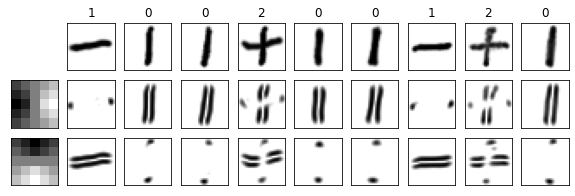

In [45]:
fig = plt.figure(figsize=(10,3))

# 두 개의 필터를 이미지 표시한다
for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, )

# 원본 이미지와 두 필터를 적용한 각각의 결과를 출력
for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), cmap=plt.cm.gray_r)
    
    # conv_vals에 h_conv_cutoff 저장됨 : 이미지 개수 X 이미지크기(가로X세로) X 출력 layer 개수 array
    # conv_vals[i,:,:,0] -> i번째 이미지에 대한 첫 번째 필터 적용 결과
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0],cmap=plt.cm.gray_r)
    
    # conv_vals[i,:,:,1] -> i번째 이미지에 대한 두 번째 필터 적용 결과
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], cmap=plt.cm.gray_r)

In [47]:

pool_vals = sess.run(h_pool, feed_dict={x:images[:9]})

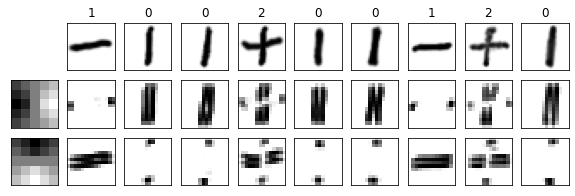

In [48]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r)

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    # conv_vals -> pool_vals
    subplot.imshow(pool_vals[i,:,:,0],cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    # conv_vals -> pool_vals
    subplot.imshow(pool_vals[i,:,:,1], cmap=plt.cm.gray_r)